<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module1/M1_3/HealthClaims_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation: Health Claims
**OPIM 5641: Business Decision Modeling - University of Connecticut**

Monte Carlo is a useful method for simulation... why be so confident when you can add some uncertainty?!

You will see this is valuable for deciding how much to set aside in your budget for your employees' health claims.

-------------------------------------------------------

**[Health Claims 14.6 - Powell]** A large manufacturing company self-insures
its employee health insurance claims. That is, it collects a fixed
amount each month from every employee for health care costs
and then it pays the entire claim amounts using its own funds to
make up the difference. It would like to estimate its total health
care payments for the coming year.


  The total number of employees at the start of the year is
11,124. The firm expects the **number of employees to change
each month over the coming year by a percentage that is
uniformly distributed between -2 percent and 5 percent**.
Employees contribute 125 USD each per month toward their
health care costs, while the average claim is 250 USD per month.
**The average claim itself is expected to grow by an amount
given by a normal distribution with a mean of 1 percent and a
standard deviation of 2 percent**.

1. What is the expected cost to the company of covering
employee health care costs in the coming year?
2. What is the maximum cost to the company of covering
employee health care costs in the coming year?
3. What is the probability that costs will not exceed 20 million USD?

In [ ]:
!pip install ipython-autotime
%load_ext autotime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

time: 302 µs (started: 2021-08-30 19:26:51 +00:00)


## Example

Let's start with a very basic set-up of the problem so we have some reasonable numbers to work with. Why not just choose values from the center of the distributions?  This is an example for one month:

In [ ]:
# Fixed parameters
Employees = 11124 #employees
EmployeeContribution = 125 #USD, per month 
AverageClaim = 250 #USD, per employee per month
MonthlyCost = Employees*(AverageClaim-EmployeeContribution)

# Uncertain parameters
EmployeeChange = 0.035 #3.5%, per month -> UNCERTAIN
ClaimGrowth = 0.01 # 1% claim growth -> UNCERTAIN


# simple solution, no claim growth, no probability distributions etc.
print("Monthly Cost:",MonthlyCost)

Monthly Cost: 1390500


This is the cost for just ONE month (around 1.3M)...But we need to generalize this for 12 MONTHS and pass info from Month 1 to Month 12... and THEN repeat 10K times so that we can explore the probabilistic output!



# A Big For Loop
To start, we are ready to build our for loop for just 12 months. The key here is to **use the value from previous iterations in future iterations**.

Later on, we will repeat this loop 10K times to generate 10K synthetic observations for probablistic analysis.

## Initialize employees

The total number of employees at the start of the year is 11,124. The firm expects the number of employees to change each month over the coming year by a percentage that is uniformly distributed between 2 percent and 5 percent.

In [ ]:
Employees = 11,124  # later on, we will add + np.random.uniform(low=-2,high=5)

## Employee Contribution

This is assumed to be fixed/deterministic, so this value will not change.

In [ ]:
# employees will always give $125
EmployeeContribution = 125 # USD

## Average Claim

The average claim is $250 per month. The average claim itself is expected to grow by an amount given by a **normal distribution with a mean of 1 percent and a standard deviation of 2 percent**.

In [ ]:
AverageClaim = 250  # later on, we will add + AverageClaim*np.random.normal(loc=0.01, scale=0.02) for growth

# lastly, let's loop this 12 times
np.arange(12) # this is 12 numbers!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Now let's try to run this for a single year to watch claims for the year. This is a loop with no growth, it just loops 12 times.

In [ ]:
# empty list where we are going to add monthly cost for 12 months!
resultDF = []

# initialize some variables the loop
Employees = 11124  # later on, we will add + np.random.uniform(low=-2,high=5)
EmployeeContribution = 125 # USD
AverageClaim = 250  # later on, we will add + AverageClaim*np.random.normal(loc=0.01, scale=0.02) for growth

# for loop
for a in np.arange(12):
  # print a - for newbie programmers
  print('Iteration:',a)
  # to start, these are our employees
  Employees = Employees #11,124 for the first iteration - will be updated at end of loop!
  # this is starting claim cost
  AverageClaim = AverageClaim # 250 for the first iteration - will be updated at end of loop!
  # this is the monthly cost - static!
  MonthlyCost = Employees*(AverageClaim-EmployeeContribution)
  print(MonthlyCost)
  # let's add this to the result
  # see how this keeps appending?
  resultDF = np.append(resultDF, MonthlyCost)
  # print!
  print(resultDF)

Iteration: 0
1390500
[1390500.]
Iteration: 1
1390500
[1390500. 1390500.]
Iteration: 2
1390500
[1390500. 1390500. 1390500.]
Iteration: 3
1390500
[1390500. 1390500. 1390500. 1390500.]
Iteration: 4
1390500
[1390500. 1390500. 1390500. 1390500. 1390500.]
Iteration: 5
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500.]
Iteration: 6
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.]
Iteration: 7
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.]
Iteration: 8
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.
 1390500.]
Iteration: 9
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.
 1390500. 1390500.]
Iteration: 10
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.
 1390500. 1390500. 1390500.]
Iteration: 11
1390500
[1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500. 1390500.
 1390500. 1390500. 1390500. 1390500.]


This was constantly 1,390,500 (12 times)... and it should be. Now let's update the projects for employees and average claim cost to show how this grows.

This is the same code as above, with a little more for the update. In practice, you'll only need this code. I did it long-form to help show you.

In [ ]:
# empty list where we are going to add monthly cost for 12 months!
resultDF = np.array([])

# initialize the loop
Employees = 11124  # later on, we will add + np.random.uniform(low=-2,high=5)
EmployeeContribution = 125 # USD
AverageClaim = 250  # later on, we will add + AverageClaim*np.random.normal(loc=0.01, scale=0.02) for growth

# for loop
for a in np.arange(12):
  # print a - for newbie programmers
  print('Iteration:',a)
  # to start, these are our employees
  Employees = Employees #11,124 for the first iteration - will be updated at end of loop!
  # this is starting claim cost
  AverageClaim = AverageClaim # 250 for the first iteration - will be updated at end of loop!
  # this is the monthly cost - static!
  MonthlyCost = Employees*(AverageClaim-EmployeeContribution)
  print('MonthlyCost:', MonthlyCost)
  # let's add this to the result
  # see how this keeps appending?
  resultDF = np.append(resultDF, MonthlyCost)
  # print! only uncomment to check your work
  # print(resultDF)

  # after the first iteration, now we update Employees and AverageClaim (cost)...
  # these will be sucked up into the top of the loop! 

  # employees - which has a uniform distribution
  # previous value + change
  Employees = Employees + Employees*np.random.uniform(low=-0.02,high=0.05)
  print('nextMonthEmployees:', Employees) # just to check!
  # average claim cost - which grows as a normal distribution
  # previous value + change
  AverageClaim = AverageClaim + AverageClaim*np.random.normal(loc=0.01, scale=0.02)
  print('nextMonthAverageClaim:', AverageClaim) # just to check!

# this statement is OUTSIDE the loop
print('resultDF:', resultDF)
print('sum(resultDF):', np.sum(resultDF))

Iteration: 0
MonthlyCost: 1390500
nextMonthEmployees: 11423.53887949781
nextMonthAverageClaim: 249.37696889075806
Iteration: 1
MonthlyCost: 1420825.1398376643
nextMonthEmployees: 11451.915285097959
nextMonthAverageClaim: 248.2545252344695
Iteration: 2
MonthlyCost: 1411500.3814901134
nextMonthEmployees: 11493.290949938462
nextMonthAverageClaim: 249.02803825933475
Iteration: 3
MonthlyCost: 1425490.3296646334
nextMonthEmployees: 11467.870696923595
nextMonthAverageClaim: 253.8049309026421
Iteration: 4
MonthlyCost: 1477118.2927176778
nextMonthEmployees: 11399.395393308427
nextMonthAverageClaim: 262.5462011446197
Iteration: 5
MonthlyCost: 1567943.5316950523
nextMonthEmployees: 11390.038815454418
nextMonthAverageClaim: 265.301884748011
Iteration: 6
MonthlyCost: 1598043.9131612573
nextMonthEmployees: 11367.7092042
nextMonthAverageClaim: 269.0491465527249
Iteration: 7
MonthlyCost: 1637508.8091245655
nextMonthEmployees: 11267.83606653849
nextMonthAverageClaim: 260.7521972618507
Iteration: 8
Mont

Analyze the output above... see how things change? Go ahead and run it three times. Sometimes it's 16M, 17M... more, less?! 

# Monte Carlo Simulation

Now the fun part - go grab all that code and stick it all in *another* for loop - we will repeat 1K times then evaluate the output. 10K takes too long (as you will see).

To do this, highlight the code above, initialize ANOTHER for loop, then paste it in (and tab it over if you need to).

`b` is for the outer loop, `a` is for the inner loop.

We commented out some stuff so it's not obnoxiously printing stuff, and it will take a little time to run - 120K iterations are about to happen!

$10000*12 = 120000$ `iterations`


In [ ]:
# results
resultDF_10K = [] # this is where we will store the 10k results

for b in np.arange(1000):
  # print b
  # print(b) # you can uncomment if you want...
  # empty list where we are going to add monthly cost for 12 months!
  resultDF = []

  # initialize the loop
  Employees = 11124  # later on, we will add + np.random.uniform(low=-2,high=5)
  EmployeeContribution = 125 # USD
  AverageClaim = 250  # later on, we will add + np.random.normal(loc=1, scale=2) for growth

  # for loop
  for a in np.arange(12):
    # print a - for newbie programmers
    # print('Iteration:',a)
    # to start, these are our employees
    Employees = Employees #11,124 for the first iteration - will be updated at end of loop!
    # this is starting claim cost
    AverageClaim = AverageClaim # 250 for the first iteration - will be updated at end of loop!
    # this is the monthly cost - static!
    MonthlyCost = Employees*(AverageClaim-EmployeeContribution)
    # print('MonthlyCost:', MonthlyCost)
    # let's add this to the result
    # see how this keeps appending?
    resultDF = np.append(resultDF, MonthlyCost)
    # print! only uncomment to check your work
    # print(resultDF)

    # after the first iteration, now we update Employees and AverageClaim (cost)...
    # these will be sucked up into the top of the loop! 

    # employees - which has a uniform distribution
    # previous value + change
    Employees = Employees + Employees*np.random.uniform(low=-0.02,high=0.05)
    # print('nextMonthEmployees:', Employees) # just to check!
    # average claim cost - which grows as a normal distribution
    # previous value + change
    AverageClaim = AverageClaim + AverageClaim*np.random.normal(loc=0.01, scale=0.02)
    # print('nextMonthAverageClaim:', AverageClaim) # just to check!

  # note how this is in the 10k loop
  resultDF = np.sum(resultDF) # I am overwriting resultDF, it's OK!
  # print('resultDF:', resultDF)
  # store it!
  resultDF_10K = np.append(resultDF_10K, resultDF)


time: 200 ms (started: 2021-08-30 19:31:23 +00:00)


In [ ]:
# check what you did - lots of values...
print(resultDF_10K.shape) # 10K entries just like we asked
resultDF_10K

(1000,)


array([20968434.6152463 , 24297792.03495956, 19596224.71211001,
       19839315.74096073, 20146102.3355868 , 19933268.90467992,
       17971628.9617516 , 24863938.7845659 , 22123636.70650288,
       21662432.35318154, 22912760.42808344, 20394303.83668078,
       25993398.15018266, 17404318.55050055, 17323897.21553385,
       21244597.03063995, 21053950.03383396, 21344373.76649776,
       18174184.0188436 , 18195626.84424721, 18154799.50038651,
       18681207.42881988, 23236123.96092765, 19892036.10850913,
       18985403.54618983, 20983509.45561589, 20463391.83485002,
       20067084.10950802, 19677793.81776451, 21760174.86189919,
       20345087.4154565 , 20027097.32336322, 21133121.77454755,
       20817682.57453124, 18598586.67060385, 18050136.31022087,
       21413026.2812581 , 20023834.6178533 , 18683827.2753453 ,
       19969909.08394317, 18823765.30001934, 19167606.90605939,
       20622446.70456177, 20371045.01125349, 19847247.2636498 ,
       20773906.27474233, 20861858.05116

time: 25.2 ms (started: 2021-08-30 19:31:26 +00:00)


## Answer: Expected Cost

In [ ]:
# what's the mean of the distribution?
np.mean(resultDF_10K)

20300764.071896438

time: 5.24 ms (started: 2021-08-30 19:31:30 +00:00)


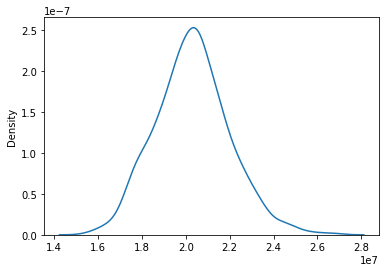

time: 201 ms (started: 2021-08-30 19:31:33 +00:00)


In [ ]:
# here is the distribution of values
sns.kdeplot(resultDF_10K)
plt.show() # gets rid of unneeded text

Let's add a nice red line where the mean is.

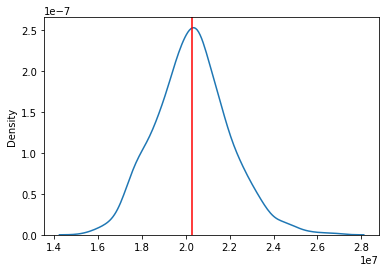

time: 262 ms (started: 2021-08-30 19:31:36 +00:00)


In [ ]:
# same plot, but with a red line
sns.kdeplot(resultDF_10K)
plt.axvline(np.mean(resultDF_10K), color='red')
plt.show()

## Answer: Max Cost

In [ ]:
# min and max?
print(np.min(resultDF_10K)) # sometimes it costs ~14M!
print(np.max(resultDF_10K)) # sometimes it costs ~24M!

15511923.320664449
26839247.9824705
time: 4.11 ms (started: 2021-08-30 19:31:39 +00:00)


## Answer: P(Cost) <= 20M
Probability that results are less than 20M.

In [ ]:
# how many are less than zero?
lessThan20M = np.where(resultDF_10K <= 20000000)
lessThan20M = np.array(lessThan20M) # make sure it stored as an array!
print(lessThan20M.shape)

(1, 426)
time: 7.23 ms (started: 2021-08-30 19:31:42 +00:00)


In [ ]:
# so, it's less than zero divided by total (10K)
print(lessThan20M.shape[1]/resultDF_10K.shape[0])

0.426
time: 2.16 ms (started: 2021-08-30 19:31:45 +00:00)


In our example, there's roughly an 45% chance of needing 20M or less to cover your costs...

As a decision-maker, it's up to you to prepare for different scenarios - the 90% probability, the 95%, the 99%... up to you to decide which level of risk is best!


# On Your Own
Can you find what the median is? The 30th percentile (30% chance costs will be below this level)? The 90th percentile (90% chance costs will be below this level, 10% chance they will be higher?)